In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
import scipy.stats as stats
from scipy.stats import zscore
from scipy.spatial.distance import pdist
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
import pingouin as pg
import plotly.express as px 
import plotly.graph_objects as go
import plotly.io as pio
# pio.renderers.default='browser'

In [3]:
## Fonte: https://www.kaggle.com/datasets/rohan0301/unsupervised-learning-on-country-data
dados_paises = pd.read_csv('data/dados_paises.csv')

### Visualizando informações sobre os dados e variáveis

In [5]:
# Estatísticas descritivas das variáveis
dados_paises.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


*Através da análise das estatísticas descritivas observa-se que os intervalos entre valores minimos e maximos é muito distinto, ou seja, os valores estão em escalas distintas, portanto, será necessário aplicar a padronização dos dados por zscore.*

In [8]:
# Matriz de correlações das variáveis

# Remover a coluna "country", pois é apenas um id
paises = dados_paises.drop(columns=['country'])

# Gerando a matriz de correlações de Pearson
matriz_corr = pg.rcorr(paises, method = 'pearson', upper = 'pval', 
                       decimals = 4, 
                       pval_stars = {0.01: '***', 0.05: '**', 0.10: '*'})

matriz_corr

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,-,***,***,,***,***,***,***,***
exports,-0.3181,-,,***,***,,***,***,***
health,-0.2004,-0.1144,-,,*,***,***,**,***
imports,-0.1272,0.7374,0.0957,-,,***,,**,
income,-0.5243,0.5168,0.1296,0.1224,-,*,***,***,***
inflation,0.2883,-0.1073,-0.2554,-0.247,-0.1478,-,***,***,***
life_expec,-0.8867,0.3163,0.2107,0.0544,0.612,-0.2397,-,***,***
total_fer,0.8485,-0.32,-0.1967,-0.159,-0.5018,0.3169,-0.7609,-,***
gdpp,-0.483,0.4187,0.346,0.1155,0.8956,-0.2216,0.6001,-0.4549,-


In [9]:
# Mapa de calor indicando a correlação entre os atributos

# Matriz de correlações básica
corr = paises.corr()

# Gráfico de calor (heatmap)
fig = go.Figure()

fig.add_trace(
    go.Heatmap(
        x = corr.columns,
        y = corr.index,
        z = np.array(corr),
        text=corr.values,
        texttemplate='%{text:.2f}',
        colorscale='viridis'))

fig.update_layout(
    height = 600,
    width = 600)

fig.show()

In [10]:
# Padronização das variáveis

# Aplicando o procedimento de ZScore em todas as variáveis
paises_pad = paises.apply(zscore, ddof=1)

# As variáveis passam a ter média = 0 e desvio padrão = 1

### Cluster hierárquico aglomerativo: distância euclidiana + single linkage

In [ ]:
# Visualizando as distâncias
dist_euclidiana = pdist(paises_pad, metric='euclidean')

# Opções para as distâncias ("metric"):
    ## euclidean
    ## sqeuclidean
    ## cityblock
    ## chebyshev
    ## canberra
    ## correlation

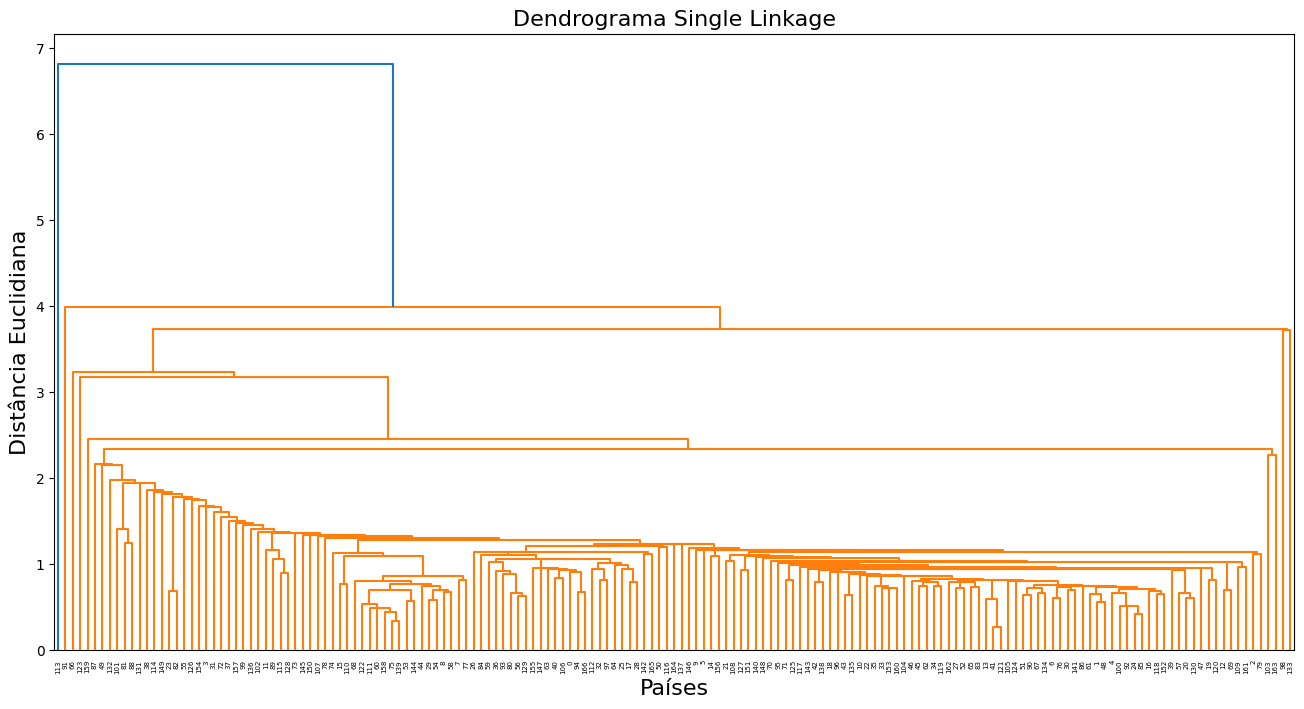

In [ ]:
# Gerando o dendrograma

plt.figure(figsize=(16,8))
dend_sing = sch.linkage(paises_pad, method = 'single', metric = 'euclidean')
dendrogram_s = sch.dendrogram(dend_sing)
plt.title('Dendrograma Single Linkage', fontsize=16)
plt.xlabel('Países', fontsize=16)
plt.ylabel('Distância Euclidiana', fontsize=16)
plt.show()

# Opções para o método de encadeamento ("method"):
    ## single
    ## complete
    ## average

# Opções para as distâncias ("metric"):
    ## euclidean
    ## sqeuclidean
    ## cityblock
    ## chebyshev
    ## canberra
    ## correlation

### Cluster hierárquico aglomerativo: distância euclidiana + average linkage

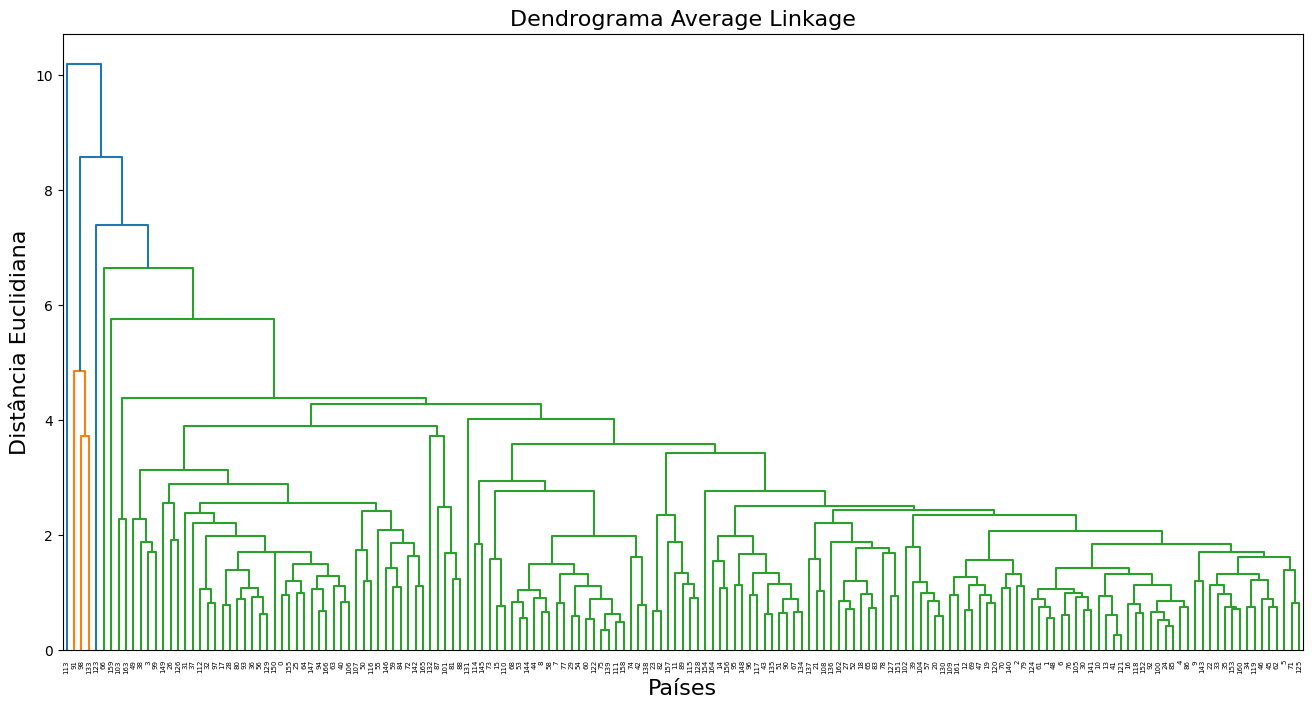

In [ ]:
# Gerando o dendrograma

plt.figure(figsize=(16,8))
dend_avg = sch.linkage(paises_pad, method = 'average', metric = 'euclidean')
dendrogram_a = sch.dendrogram(dend_avg)
plt.title('Dendrograma Average Linkage', fontsize=16)
plt.xlabel('Países', fontsize=16)
plt.ylabel('Distância Euclidiana', fontsize=16)
plt.show()

### Cluster hierárquico aglomerativo: distância euclidiana + complete linkage

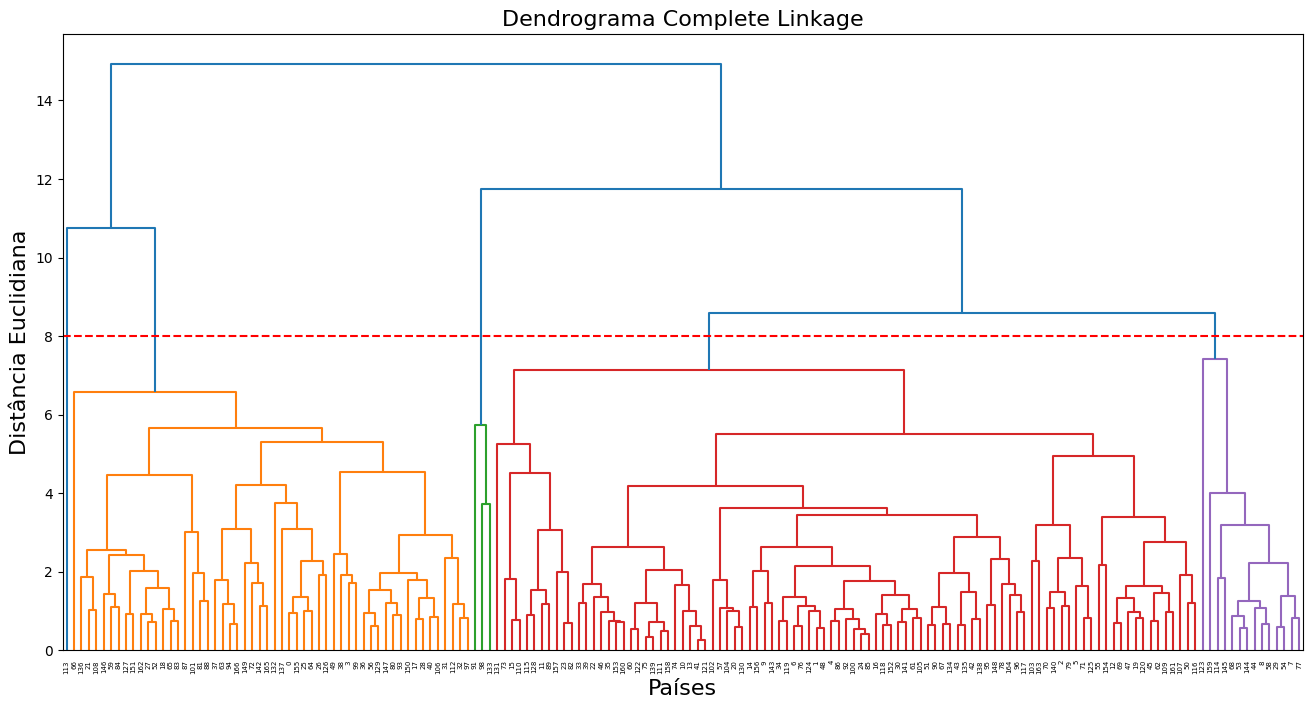

In [ ]:
# Gerando o dendrograma

plt.figure(figsize=(16,8))
dend_compl = sch.linkage(paises_pad, method = 'complete', metric = 'euclidean')
dendrogram_c = sch.dendrogram(dend_compl, color_threshold = 8)
plt.title('Dendrograma Complete Linkage', fontsize=16)
plt.xlabel('Países', fontsize=16)
plt.ylabel('Distância Euclidiana', fontsize=16)
plt.axhline(y = 8, color = 'red', linestyle = '--')
plt.show()

In [15]:
# Gerando a variável com a indicação do cluster no dataset

cluster_comp = AgglomerativeClustering(n_clusters = 5, metric = 'euclidean', linkage = 'complete')
indica_cluster_comp = cluster_comp.fit_predict(paises_pad)
dados_paises['cluster_complete'] = indica_cluster_comp
paises_pad['cluster_complete'] = indica_cluster_comp
dados_paises['cluster_complete'] = dados_paises['cluster_complete'].astype('category')
paises_pad['cluster_complete'] = paises_pad['cluster_complete'].astype('category')

### Análise de variância de um fator (ANOVA)

*Interpretação do output:*

- cluster_kmeans MS: indica a variabilidade entre grupos
- Within MS: indica a variabilidade dentro dos grupos
- F: estatística de teste (cluster_kmeans MS / Within MS)
- p-unc: p-valor da estatística F
- se p-valor < 0.05: pelo menos um cluster apresenta média estatisticamente diferente dos demais

In [ ]:
# child_mort
print("child_mort")
display(pg.anova(dv='child_mort', 
         between='cluster_complete', 
         data=paises_pad,
         detailed=True).T)

# exports
print("exports")
display(pg.anova(dv='exports', 
         between='cluster_complete', 
         data=paises_pad,
         detailed=True).T)

# imports
print("imports")
display(pg.anova(dv='imports', 
         between='cluster_complete', 
         data=paises_pad,
         detailed=True).T)

# health
print("health")
display(pg.anova(dv='health', 
         between='cluster_complete', 
         data=paises_pad,
         detailed=True).T)

# income
print("income")
display(pg.anova(dv='income', 
         between='cluster_complete', 
         data=paises_pad,
         detailed=True).T)

# inflation
print("inflation")
display(pg.anova(dv='inflation', 
         between='cluster_complete', 
         data=paises_pad,
         detailed=True).T)

# life_expec
print("life_expec")
display(pg.anova(dv='life_expec', 
         between='cluster_complete', 
         data=paises_pad,
         detailed=True).T)

# total_fer
print("total_fer")
display(pg.anova(dv='total_fer', 
         between='cluster_complete', 
         data=paises_pad,
         detailed=True).T)

# gdpp
print("gdpp")
display(pg.anova(dv='gdpp', 
         between='cluster_complete', 
         data=paises_pad,
         detailed=True).T)

## A variável mais discriminante contém a maior estatística F (e significativa)
## O valor da estatística F é sensível ao tamanho da amostra

child_mort


,0,1
Source,cluster_complete,Within
SS,100.71482,65.28518
DF,4,162
MS,25.178705,0.402995
F,62.478961,NaN
p-unc,0.0,NaN
np2,0.606716,NaN


exports


,0,1
Source,cluster_complete,Within
SS,79.966834,86.033166
DF,4,162
MS,19.991709,0.531069
F,37.644283,NaN
p-unc,0.0,NaN
np2,0.481728,NaN


imports


,0,1
Source,cluster_complete,Within
SS,69.028651,96.971349
DF,4,162
MS,17.257163,0.598589
F,28.829756,NaN
p-unc,0.0,NaN
np2,0.415835,NaN


health


,0,1
Source,cluster_complete,Within
SS,25.065957,140.934043
DF,4,162
MS,6.266489,0.869963
F,7.203166,NaN
p-unc,0.000023,NaN
np2,0.151,NaN


income


,0,1
Source,cluster_complete,Within
SS,84.56379,81.43621
DF,4,162
MS,21.140947,0.502693
F,42.055414,NaN
p-unc,0.0,NaN
np2,0.50942,NaN


inflation


,0,1
Source,cluster_complete,Within
SS,88.665145,77.334855
DF,4,162
MS,22.166286,0.477376
F,46.433635,NaN
p-unc,0.0,NaN
np2,0.534127,NaN


life_expec


,0,1
Source,cluster_complete,Within
SS,111.450643,54.549357
DF,4,162
MS,27.862661,0.336724
F,82.746182,NaN
p-unc,0.0,NaN
np2,0.671389,NaN


total_fer


,0,1
Source,cluster_complete,Within
SS,113.930595,52.069405
DF,4,162
MS,28.482649,0.321416
F,88.616129,NaN
p-unc,0.0,NaN
np2,0.686329,NaN


gdpp


,0,1
Source,cluster_complete,Within
SS,107.339064,58.660936
DF,4,162
MS,26.834766,0.362105
F,74.107785,NaN
p-unc,0.0,NaN
np2,0.646621,NaN


In [18]:
# Gráfico 3D dos clusters

# Perspectiva 1
fig = px.scatter_3d(dados_paises, 
                    x='total_fer', 
                    y='income', 
                    z='life_expec',
                    color='cluster_complete')
fig.show()

# Perspectiva 2
fig = px.scatter_3d(dados_paises, 
                    x='gdpp', 
                    y='income', 
                    z='life_expec',
                    color='cluster_complete')
fig.show()

In [19]:
# Identificação das características dos clusters

# Agrupando o banco de dados

analise_paises = dados_paises.drop(columns=['country']).groupby(by=['cluster_complete'])

# Estatísticas descritivas por grupo

tab_medias_grupo = analise_paises.mean().T
tab_desc_grupo = analise_paises.describe().T

C:\Users\guilh\AppData\Local\Temp\ipykernel_23184\1817073079.py:5: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



### Análise por K-Means

In [20]:
# Considerando que identificamos 3 possíveis clusters na análise hierárquica

kmeans = KMeans(n_clusters=5, init='random', random_state=100).fit(paises_pad)

# Gerando a variável para identificarmos os clusters gerados

kmeans_clusters = kmeans.labels_
paises['cluster_kmeans'] = kmeans_clusters
paises['cluster_kmeans'] = paises['cluster_kmeans'].astype('category')

In [23]:
# Identificando as coordenadas centroides dos clusters finais

cent_finais = pd.DataFrame(kmeans.cluster_centers_)
cent_finais.columns = paises_pad.columns
cent_finais.index.name = 'cluster'
cent_finais

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_complete
cluster,,,,,,,,,,
0,-0.776925,2.627626,-0.637802,1.689301,2.846774,-0.126418,1.005750,-0.776475,2.024057,1.250000
1,-0.842325,-0.117065,1.368100,-0.447578,1.186503,-0.590299,1.164708,-0.758309,1.762483,0.409091
2,-0.140241,-0.420707,-0.716347,-0.762498,-0.266867,0.464469,0.115501,-0.227212,-0.402624,1.000000
3,-0.644589,0.334981,0.080190,0.410300,-0.031907,-0.366123,0.513621,-0.711788,-0.164415,1.000000
4,1.090012,-0.353908,-0.067138,0.067921,-0.691587,0.271805,-1.124587,1.169110,-0.602686,3.981818


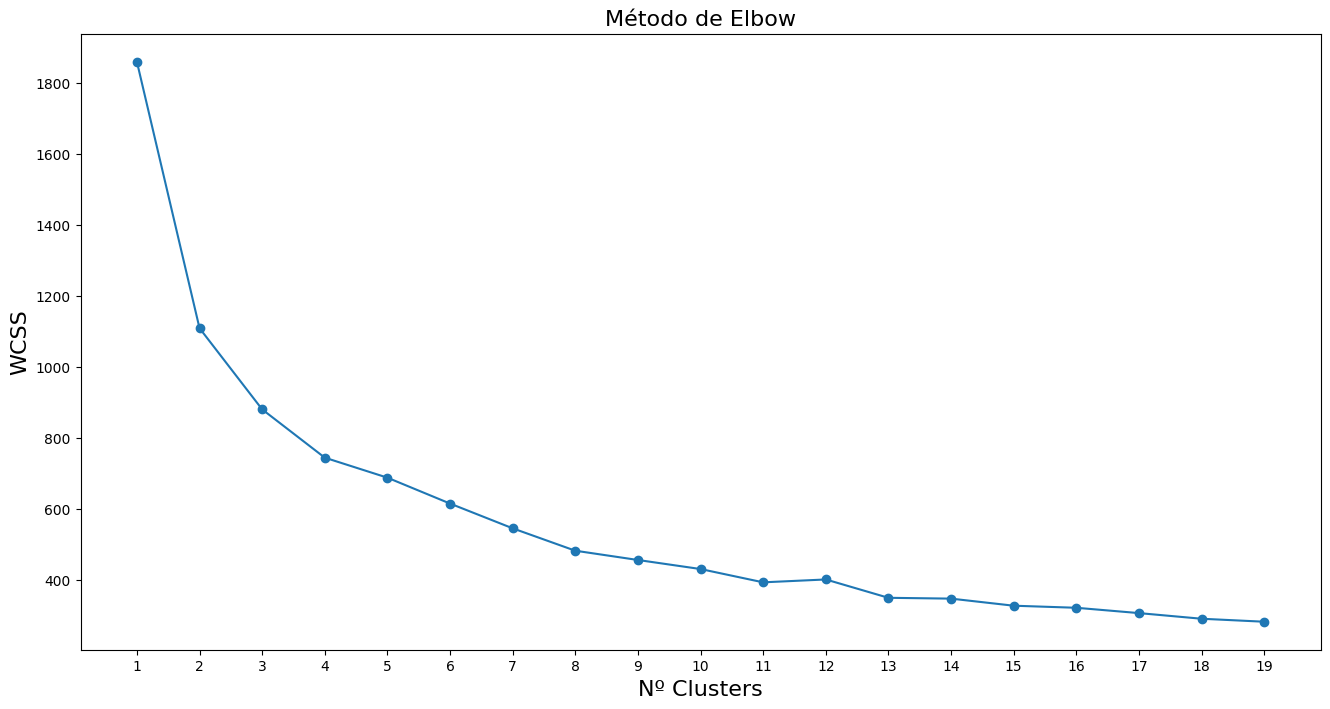

In [27]:
elbow = []
K = range(1,20) # ponto de parada pode ser parametrizado manualmente
for k in K:
    kmeanElbow = KMeans(n_clusters=k, init='random', random_state=100).fit(paises_pad)
    elbow.append(kmeanElbow.inertia_)
    
plt.figure(figsize=(16,8))
plt.plot(K, elbow, marker='o')
plt.xlabel('Nº Clusters', fontsize=16)
plt.xticks(range(1,20))
plt.ylabel('WCSS', fontsize=16)
plt.title('Método de Elbow', fontsize=16)
plt.show()